<h3 align = "center" style = "color:blue">Import Data </h3>

In [85]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split

pd.set_option('display.float_format', lambda x : '{:.2f}'.format(x))
np.set_printoptions(suppress = True)

In [86]:
df_customers = pd.read_csv("customers.csv")
df_loans = pd.read_csv("loans.csv")
df_bureau = pd.read_csv("bureau_data.csv")

In [87]:
df_customers.shape, df_loans.shape, df_bureau.shape

((50000, 12), (50000, 15), (50000, 8))

In [88]:
df = pd.merge(df_customers, df_loans, on = 'cust_id')
df.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2467000,49340.00,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,3883000,77660.00,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2170000,43400.00,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False


In [89]:
df = pd.merge(df, df_bureau)
df.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2019-07-24,2019-08-10,False,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,2019-07-24,2019-08-15,False,3,1,96,12,60,5,4
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2019-07-24,2019-08-21,False,2,1,82,24,147,6,58


In [90]:
df['default'] = df['default'].astype(int)
df.default.value_counts()

default
0    45703
1     4297
Name: count, dtype: int64

In [91]:
df.head(2)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2019-07-24,2019-08-10,0,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,2019-07-24,2019-08-15,0,3,1,96,12,60,5,4


In [92]:
X = df.drop('default', axis = 'columns')
y = df['default']

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, test_size = 0.25, random_state = 42)

df_train = pd.concat([X_train, y_train], axis = 'columns')
df_test = pd.concat([X_test, y_test], axis = 'columns')

df_train.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
12746,C12747,59,M,Married,Self-Employed,11327000,3,Owned,30,Hyderabad,...,2020-10-31,2020-11-11,4,2,152,20,118,4,36,0
32495,C32496,44,F,Single,Salaried,715000,0,Owned,27,Mumbai,...,2022-10-22,2022-10-27,3,1,160,10,62,5,5,0
43675,C43676,38,M,Single,Salaried,3195000,0,Mortgage,26,Chennai,...,2023-12-04,2023-12-29,1,1,54,12,67,4,0,0
9040,C09041,42,M,Married,Salaried,1500000,2,Mortgage,30,Bangalore,...,2020-06-18,2020-07-07,3,0,76,0,0,8,87,0
13077,C13078,58,M,Married,Self-Employed,1817000,4,Owned,29,Pune,...,2020-11-12,2020-12-07,1,2,60,0,0,1,71,0


In [93]:
df_train.shape, df_test.shape

((37500, 33), (12500, 33))

<h3 align = "center" style = "color:blue">Data Cleaning </h3>

In [94]:
df_train.isna().sum()

cust_id                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 47
years_at_current_address        0
city                            0
state                           0
zipcode                         0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_months               0
total_dpd     

In [95]:
df_train.residence_type.unique()

array(['Owned', 'Mortgage', 'Rented', nan], dtype=object)

In [96]:
mode_residence = df_train.residence_type.mode()[0]
mode_residence

'Owned'

In [97]:
df_train.residence_type.fillna(mode_residence, inplace = True)
df_train.residence_type.unique()

/var/folders/5p/c2xb830j155cnz4y4jbjymnc0000gn/T/ipykernel_31197/492394830.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train.residence_type.fillna(mode_residence, inplace = True)


array(['Owned', 'Mortgage', 'Rented'], dtype=object)

In [98]:
df_train.residence_type.fillna(mode_residence, inplace = True)

In [99]:
df_train.duplicated().sum()

np.int64(0)

In [100]:
df_train.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default'],
      dtype='object')

In [101]:
columns_continuous = ['age','income', 'number_of_dependants','years_at_current_address', 'sanction_amount', 'loan_amount',
                     'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
                     'principal_outstanding', 'bank_balance_at_application','number_of_open_accounts',
                     'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
                     'total_dpd', 'enquiry_count', 'credit_utilization_ratio']
columns_categorical = ['gender', 'marital_status', 'employment_status', 'residence_type',
                       'state', 'zipcode', 'loan_id','loan_purpose', 'loan_type','default']

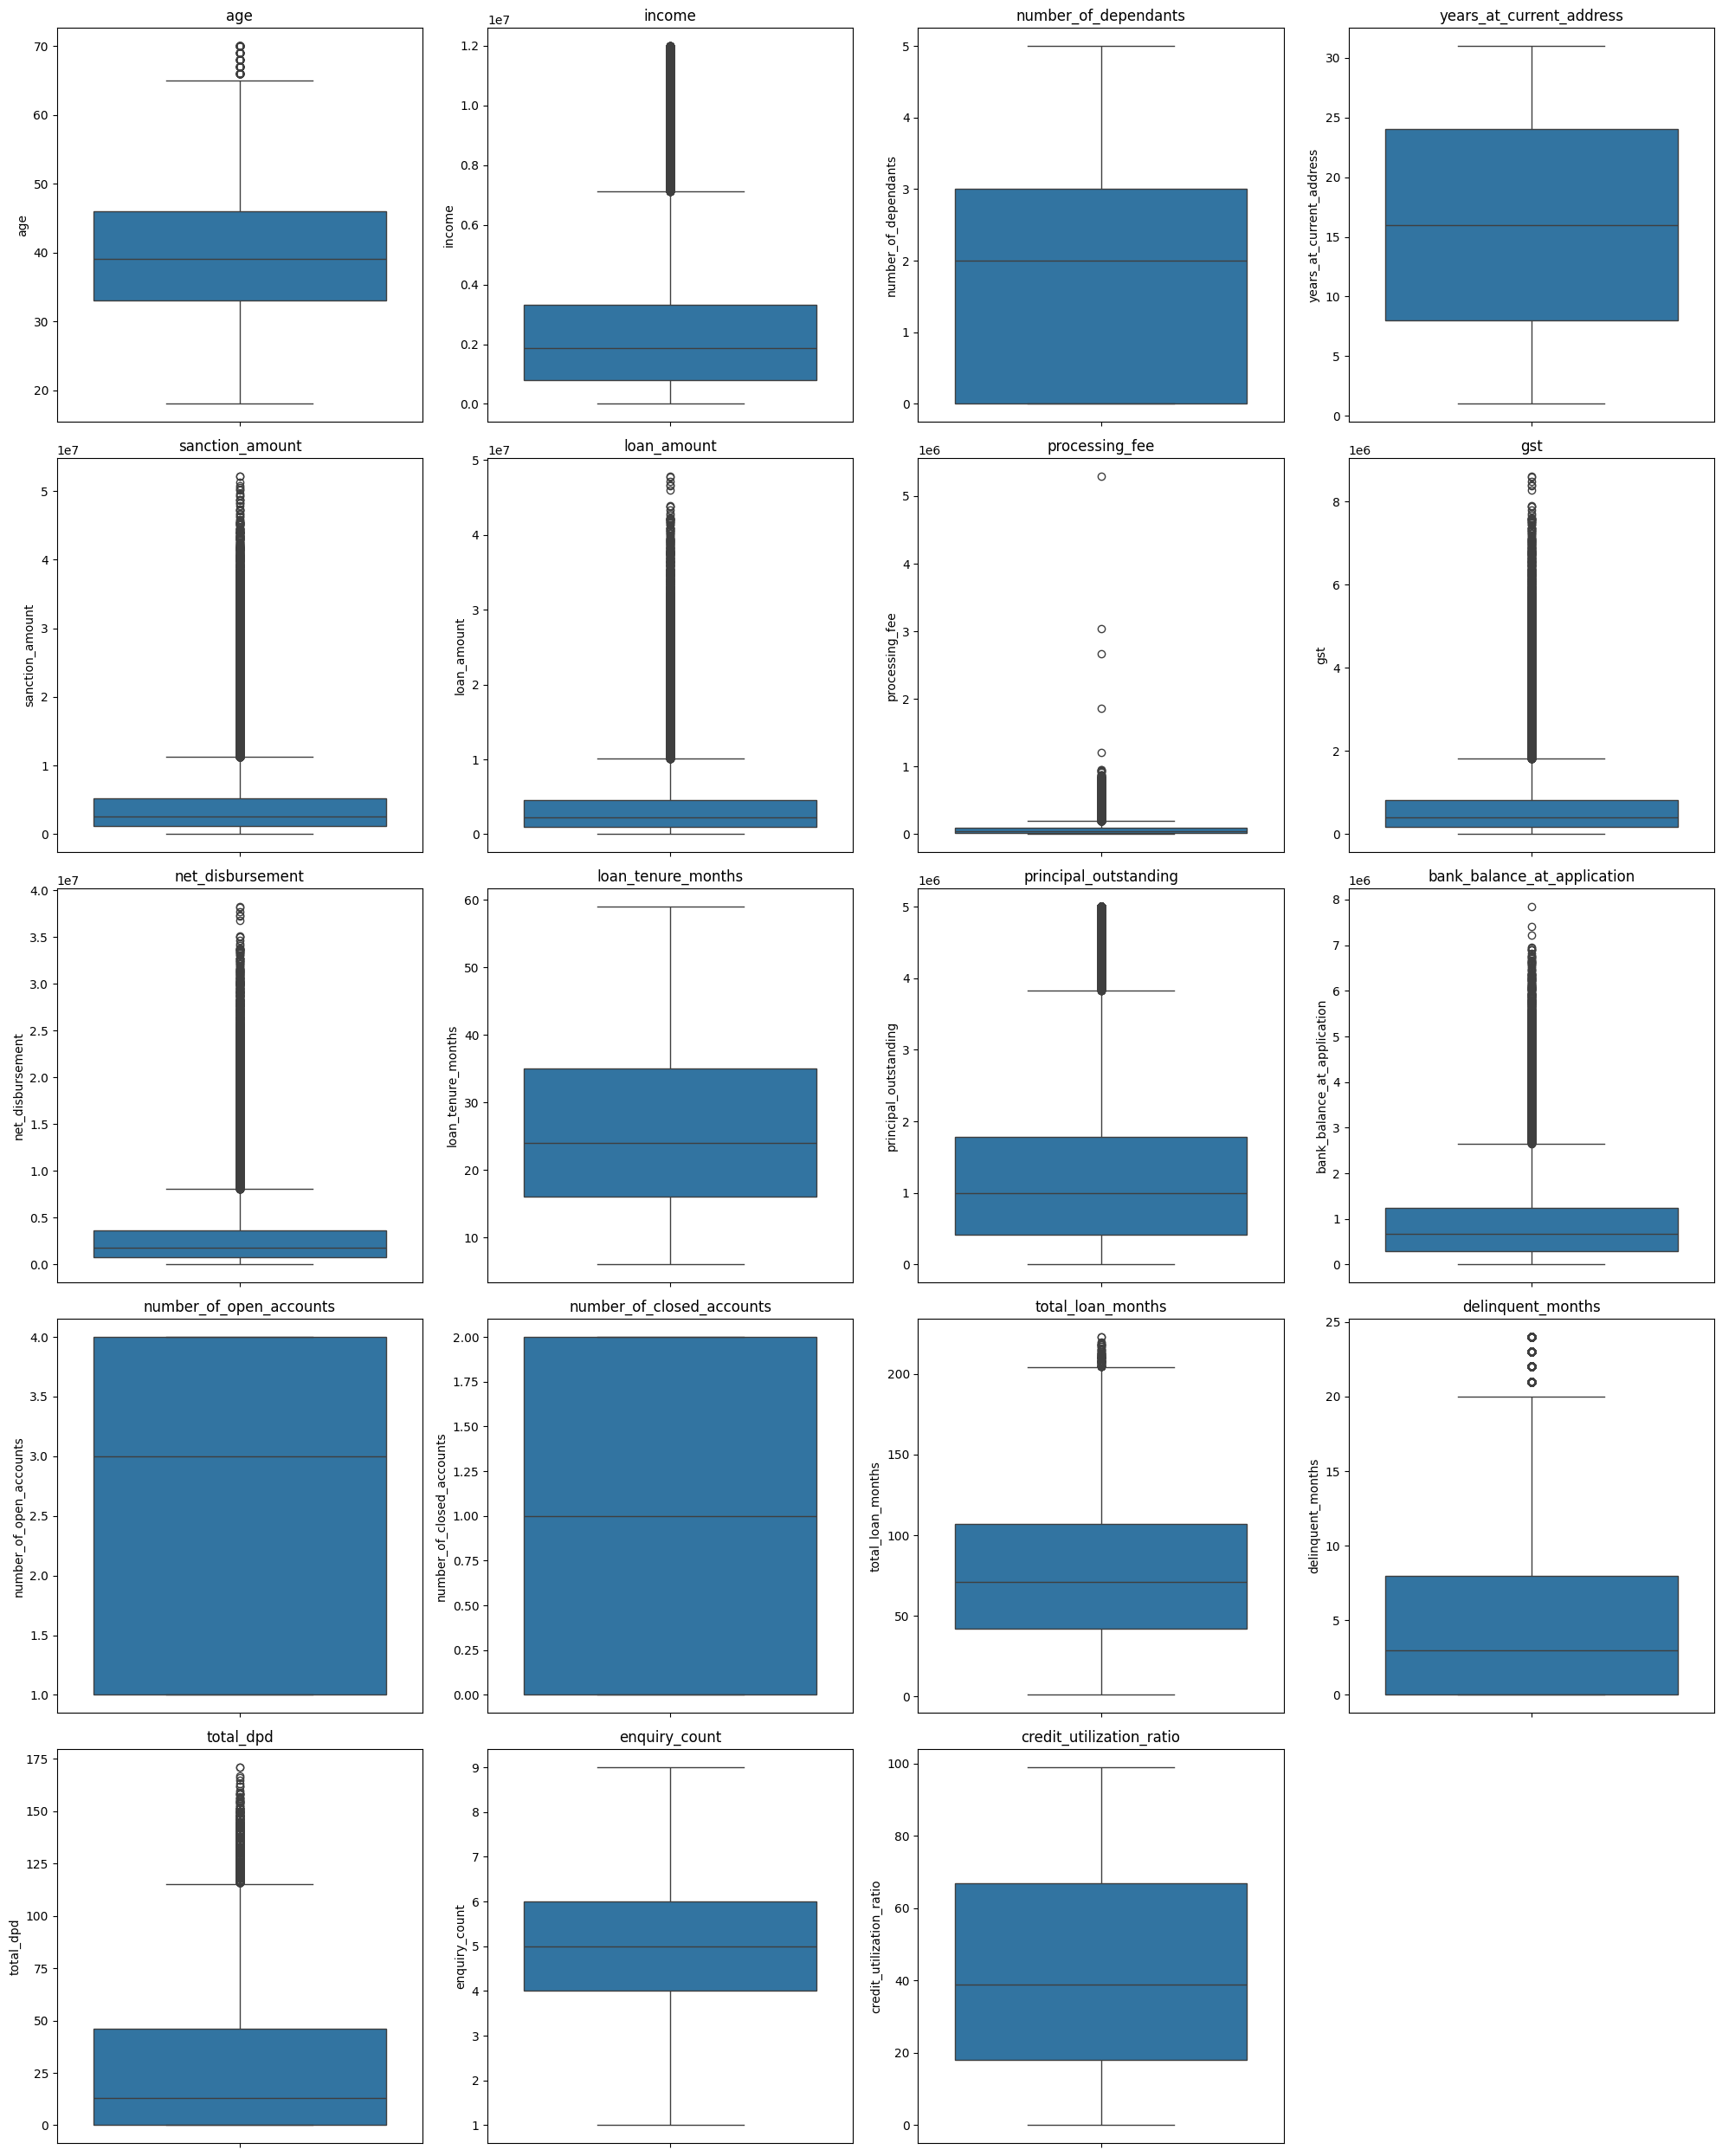

In [102]:
num_plots = len(columns_continuous)
num_cols = 4  # Number of plots per row
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))  # Adjust figure size
axes = axes.flatten()  # Flatten the axes array for easier indexing

for i, col in enumerate(columns_continuous):
    sns.boxplot(df_train[col], ax=axes[i])
    axes[i].set_title(col)  # Set the title to the name of the variable

# If there are any empty plots (when num_plots isn't a perfect multiple of num_cols), hide the axes
for j in range(i + 1, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


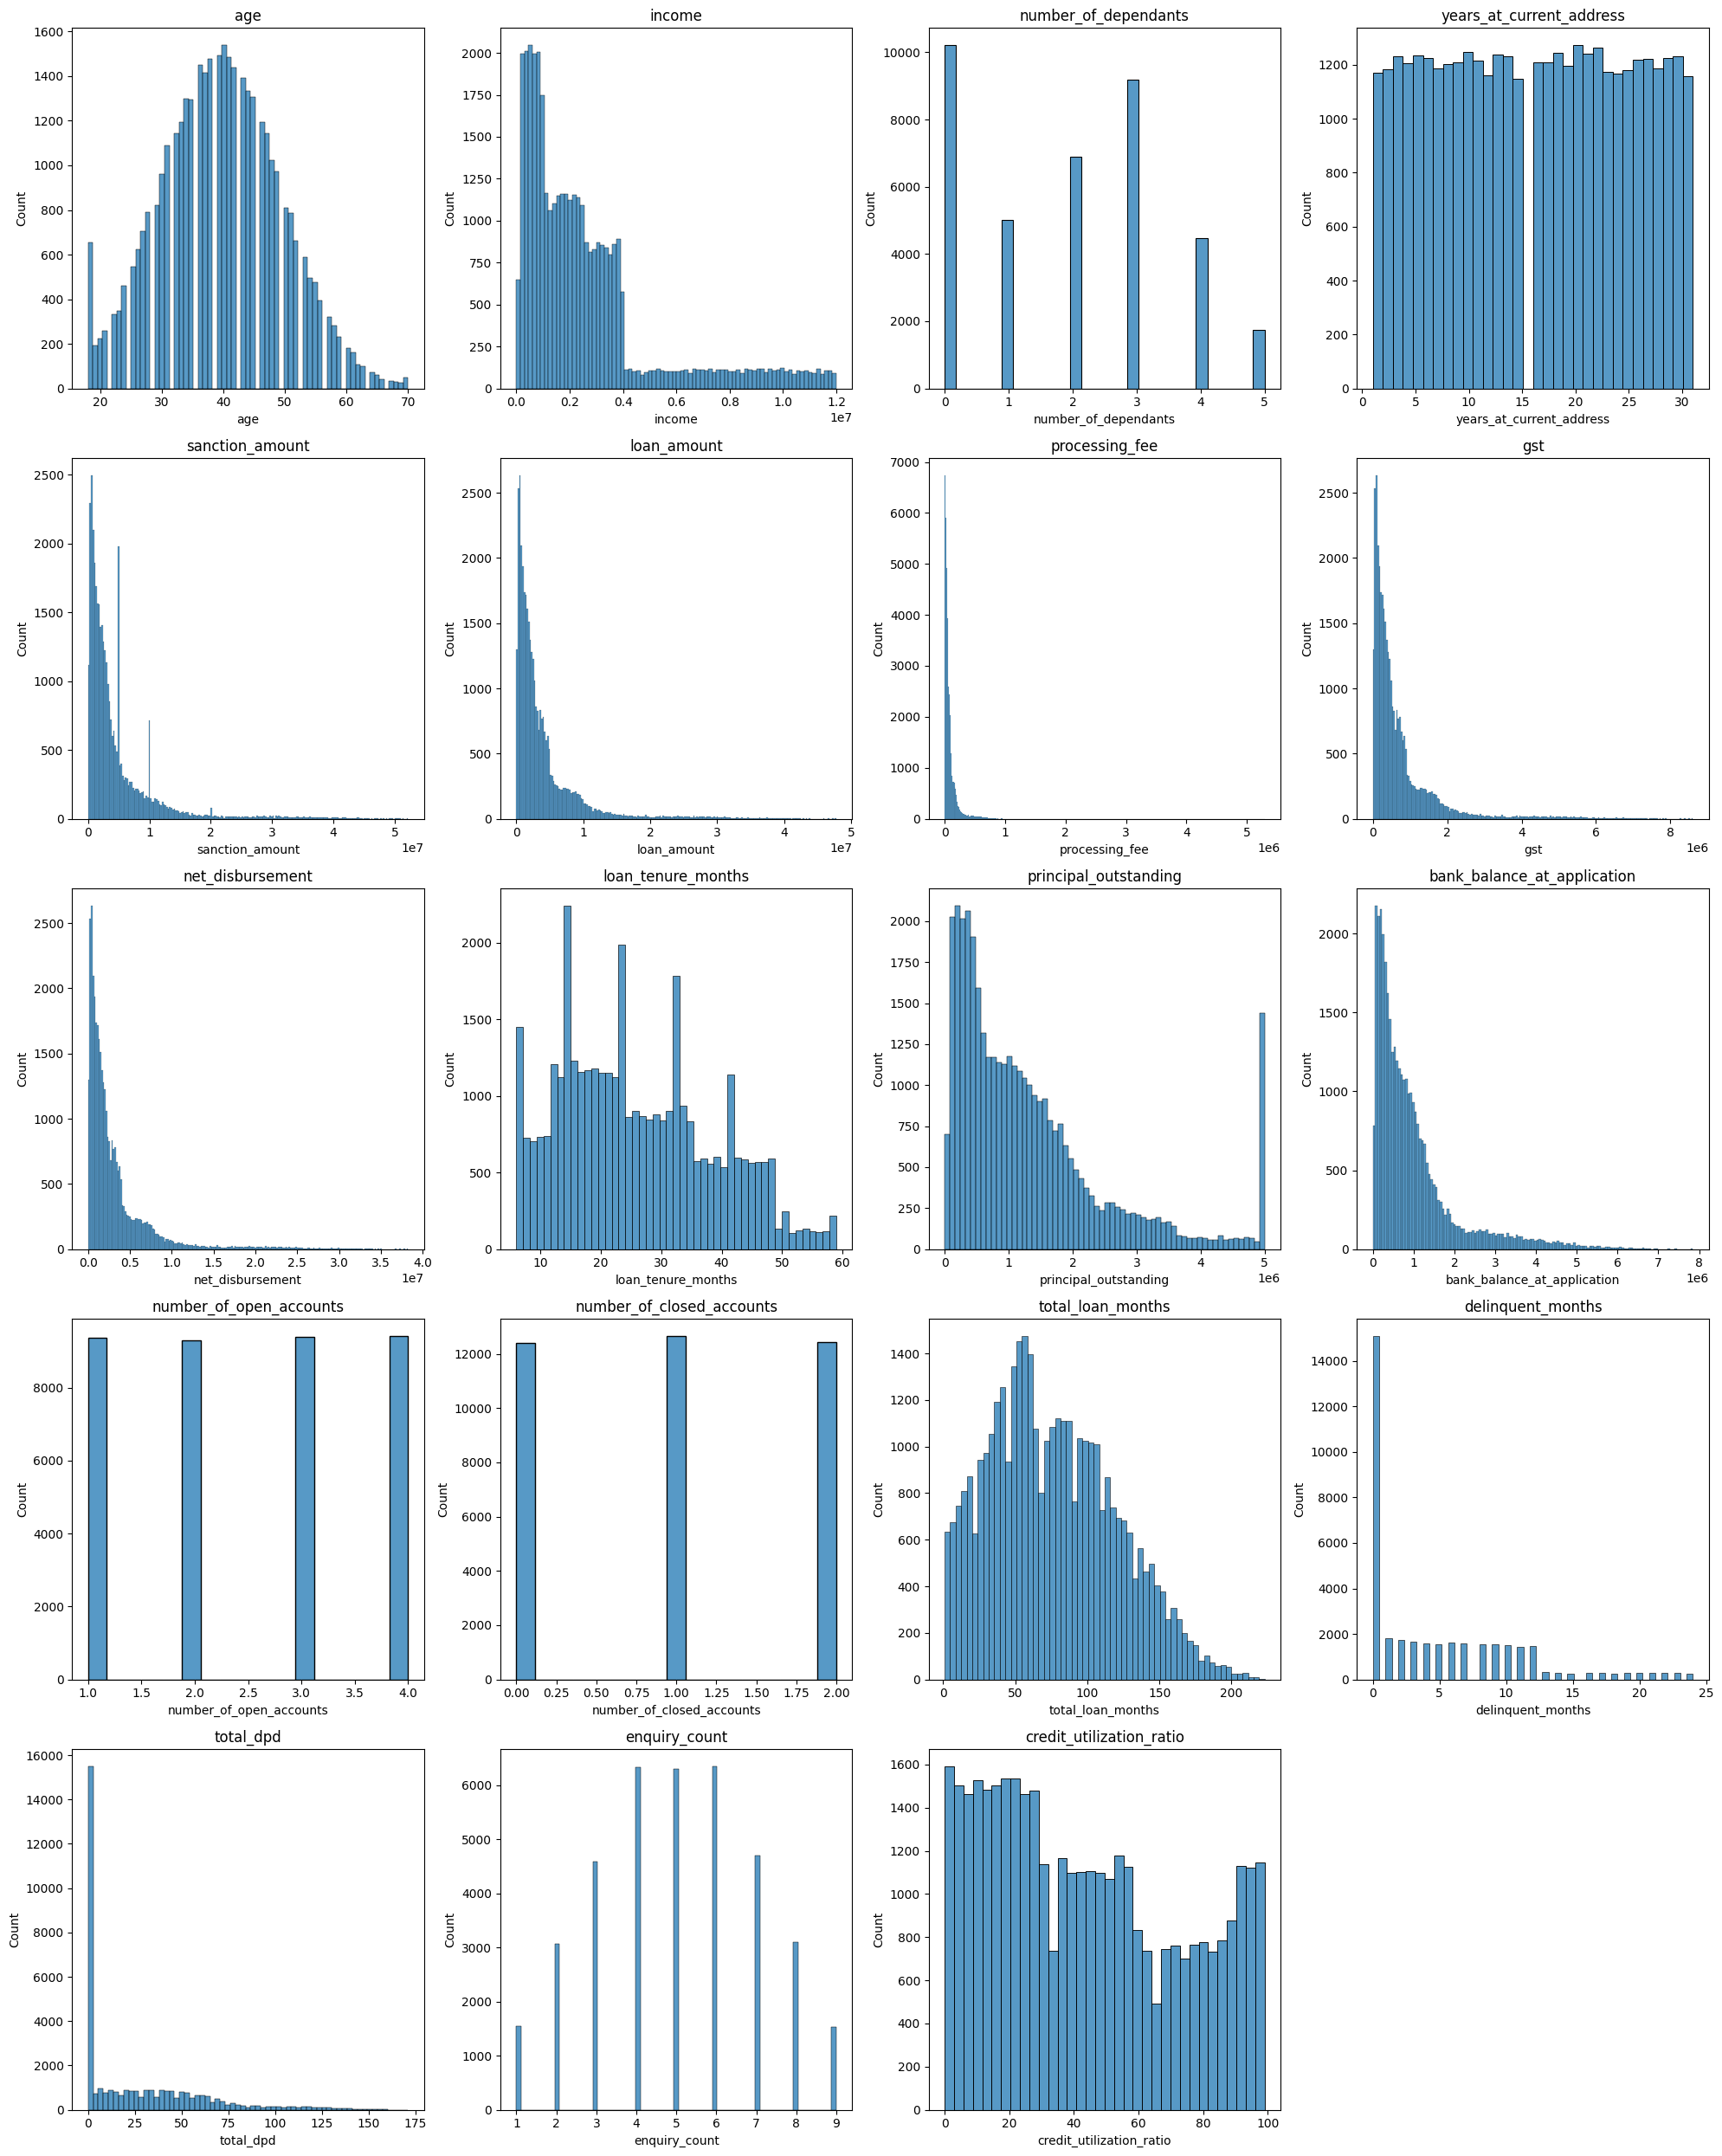

In [103]:
num_plots = len(columns_continuous)
num_cols = 4  # Number of plots per row
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))  # Adjust figure size
axes = axes.flatten()  # Flatten the axes array for easier indexing

for i, col in enumerate(columns_continuous):
    sns.histplot(df_train[col], ax=axes[i])
    axes[i].set_title(col)  # Set the title to the name of the variable

# If there are any empty plots (when num_plots isn't a perfect multiple of num_cols), hide the axes
for j in range(i + 1, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()



In [104]:
df_train.processing_fee.describe()

count     37500.00
mean      80290.68
std      113128.14
min           0.00
25%       19220.00
50%       44600.00
75%       92420.00
max     5293543.52
Name: processing_fee, dtype: float64

In [105]:
df_train[df_train.processing_fee == df_train.processing_fee.max()][["loan_amount","processing_fee"]]

,loan_amount,processing_fee
9898,3626000,5293543.52


In [106]:
df_train[df_train.processing_fee / df_train.loan_amount>0.03][["loan_amount","processing_fee"]]

,loan_amount,processing_fee
23981,2234000,2669791.02
28174,966000,1214492.67
47089,1738000,1858964.77
29305,2616000,3036378.01
9898,3626000,5293543.52


In [107]:
df_train_1 = df_train[df_train.processing_fee / df_train.loan_amount<0.03].copy()
df_train_1[df_train_1.processing_fee / df_train_1.loan_amount>0.03][["loan_amount","processing_fee"]]

,loan_amount,processing_fee


In [108]:
df_test = df_test[df_test.processing_fee / df_test.loan_amount<0.03].copy()
df_test.shape

(12497, 33)

In [109]:
for col in columns_categorical:
    print(col,'-->', df_train_1[col].unique())

gender --> ['M' 'F']
marital_status --> ['Married' 'Single']
employment_status --> ['Self-Employed' 'Salaried']
residence_type --> ['Owned' 'Mortgage' 'Rented']
state --> ['Telangana' 'Maharashtra' 'Tamil Nadu' 'Karnataka' 'West Bengal'
 'Gujarat' 'Delhi' 'Uttar Pradesh' 'Rajasthan']
zipcode --> [500001 400001 600001 560001 411001 700001 380001 110001 226001 302001]
loan_id --> ['L12747' 'L32496' 'L43676' ... 'L45237' 'L49229' 'L37785']
loan_purpose --> ['Home' 'Education' 'Personal' 'Auto' 'Personaal']
loan_type --> ['Secured' 'Unsecured']
default --> [0 1]


In [110]:
df_train_1['loan_purpose'] = df_train_1['loan_purpose'].replace('Personaal','Personal')
df_test['loan_purpose'] = df_test['loan_purpose'].replace('Personaal','Personal')
df_train_1.loan_purpose.unique()

array(['Home', 'Education', 'Personal', 'Auto'], dtype=object)

In [111]:
df_train[(df_train.gst/df_train.loan_amount)>0.2]

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
